# Задача 12. Экспериментальное исследование алгоритмов решения задачи достижимости с контекстно-свободными ограничениями
# Автор: [kznts9v-1lya](https://github.com/kznts9v-1lya)


## Введение
Пусть имеется размеченный ориентированный граф $G$. Будем интерпретировать его как конечный автомат. Таким образом, считаем, что граф $G$ (его представление в виде КА) задает регулярный язык $L_G$.

Пусть нам задана КС-грамматика $CFG$, задающая язык ограничений $L_{CFG}$.

Рассмотрим задачу $CFPQ = \{(v_i, v_j)|\exists\pi:w(v_i\pi v_j)\in L, v_i\in V_S, v_j\in V_F\}$, где $L = L_G\cap L_{CFG}$

Для языка $L_{CFG}$ строим рекурсивный автомат $-$ в нашем случае являющийся конечным автоматом над смешанным алфавитом грамматики.

## Постановка задачи
Задача посвящена анализу производительности различных алгоритмов решения задачи достижимости с контекстно-свободными ограничениями: алгоритма Хеллингса, матричного алгоритма, тензорного алгоритма. В ходе анализа необходимо
- Сравнить производительности реализаций различных алгоритмов для одной аппаратной платформы (CPU, GPU) и определить наиболее производительный алгоритм в рамках одной платформы.
- Сравнить производительности различных реализаций алгоритмов для разных платформ (CPU vs. GPU) и определить наиболее производительную реализацию.
- Сравнить производительности CFPQ алгоритмов со специализированными RPQ алгоритмами в задаче RPQ анализа и определить необходимость существования решения для частных случаев.

## Описание работы

- [x] Используя [pyCuBool](https://pypi.org/project/pycubool/) реализовать матричный алгоритм решения задачи достижимости с КС ограничениями. Аналогично тому, как это было сделано в домашней работе 10.
- [x] Используя [pyCuBool](https://pypi.org/project/pycubool/) реализовать тензорный алгоритм решения задачи достижимости с КС ограничениями. Аналогично тому, как это было сделано в домашней работе 11.
- [x] Подключить реализацию алгоритма Хеллингса из работы 9, матричного из 10 и тензорного из 11.
- [x] Сформировать набор данных.
  - [x] Выбрать все графы из раздела [RDF](https://jetbrains-research.github.io/CFPQ_Data/dataset/RDF.html).
  - [x] Запросы к RDF состоят из следующих блоков
    - Запросы из работы 5. Так как регулярные языки --- это подмножество контекстно-свободных, то решения, рассматриваемые в данной работе должны справляться с ними. Взять необходимо ровно те запросы, которые использовали именно вы. При этом, обратите внимание на то, что для разных алгоритмов нужен разный формат входа. Например, для тензорного грамматику из регулярного выражения можно получить просто сделав это выражение правой частью единственного правила.
    - Три классических запроса для анализа иерархии.
      - ```S -> subClassOf_r S subClassOf | type_r S type | subClassOf_r subClassOf | type_r type ```
      - ```S -> subClassOf_r S subClassOf | subClassOf ```
      - ```S -> broaderTransitive S broaderTransitive_r | broaderTransitive broaderTransitive_r ```
  - [x] Выбрать графы bzip, gzip, ls, init, drivers, arch. Это графы, построенные по реальным программам и предназначенные для решения задач статического анализа.
  - [x] Для статического анализа использовать единственный запрос. Обратите внимание, что он записан в максимально общем виде и непосредственно грамматика будет зависеть от алгоритма, который будет исследоваться.
    - ```
       M -> d_r V d
       V -> (M? a_r)∗ M? (a M?)∗
      ```
- [x] С использованием сформированного набора данных провести сравнение производительности следующих решений
  - алгоритм Хеллингса
  - матричный алгоритм, реализованный с использованием sciPy
  - тензорный алгоритм, реализованный с использованием sciPy
  - матричный алгоритм, реализованный с использованием pyCuBool
  - тензорный алгоритм, реализованный с использованием pyCuBool
  - алгоритм выполнения регулярных запросов, реализованный с использованием pyCuBool (работа 5). Здесь только для RDF и регулярных запросов.
  - алгоритм выполнения регулярных запросов, реализованный с использованием sciPy. Здесь только для RDF и регулярных запросов.
- [x] Оформить результаты экспериментов
- [x] Провести анализ результатов
- [x] Сделать notebook доступным по ссылке (обязательно выдать права на комментирование проверяющему)

## Настройка проекта и зависимостей

In [1]:
!git clone https://github.com/kznts9v-1lya/formal-lang-course.git &> /dev/null

In [2]:
%cd formal-lang-course

/content/formal-lang-course


In [3]:
!git checkout task12-cfpq-research &> /dev/null

In [4]:
%mkdir -p ./researches/data

%mkdir ./researches/data/scipy_hellings_cfpq
%mkdir ./researches/data/scipy_matrix_cfpq
%mkdir ./researches/data/scipy_tensor_cfpq
%mkdir ./researches/data/pycubool_matrix_cfpq
%mkdir ./researches/data/pycubool_tensor_cfpq

In [5]:
!pip install -r requirements.txt &> /dev/null

In [6]:
!pip install pycubool &> /dev/null

## Описание набора данных

### Графы

Датасет состоит из графов и запросов, представленных контекстно-свободными грамматиками над метками соответствующих графов.

Для проведения эксперимета использовались RDF графы, представленные в библиотеке [CFPQ_Data](https://github.com/JetBrains-Research/CFPQ_Data), кроме графов *taxonomy*, *taxonomy_hierarchy* (которые не поместились в ОЗУ) и *go_hierarchy* (который имеет всего одну метку).

In [7]:
from project.graph_tools import get_from_dataset

In [8]:
graph_names = [
             'atom_primitive', 
             'biomedical_mesure_primitive', 
             'core', 
             'eclass_514en', 
             'enzyme', 
             'foaf', 
             'funding', 
             'generations', 
             'geospecies', 
             'go', 
             'go_hierarchy', 
             'pathways', 
             'people_pets', 
             'pizza', 
             'skos', 
             'travel', 
             'univ_bench', 
             'wine'
] 

#### Загрузка данных

In [9]:
graphs = {}

for name in graph_names:
  graph = get_from_dataset(name, True)
  graphs[name] = graph

Loading...: 100%|██████████| 273/273 [00:00<00:00, 77185.37it/s]
file:///usr/local/lib/python3.7/dist-packages/cfpq_data/data/RDF/Graphs/<http:/sw.opencyc.org/concept/Mx4rvVi495wpEbGdrcN5Y29ycA> does not look like a valid URI, trying to serialize this will break.
file:///usr/local/lib/python3.7/dist-packages/cfpq_data/data/RDF/Graphs/<http:/sw.opencyc.org/concept/Mx4rvVi495wpEbGdrcN5Y29ycA> does not look like a valid URI, trying to serialize this will break.
Loading...: 100%|██████████| 1839/1839 [00:00<00:00, 98771.02it/s]


#### Характеристики данных

In [10]:
import pandas as pd

data = {name: [graph.description.nodes, graph.description.edges, len(graph.description.edge_labels)] for name, graph in graphs.items()}
columns = ['Nodes', 'Edges', 'Labels']

graph_descriptions = pd.DataFrame.from_dict(data, orient='index', columns=columns)

graph_descriptions

,Nodes,Edges,Labels
atom_primitive,291,425,17
biomedical_mesure_primitive,341,459,10
core,1323,2752,31
eclass_514en,239111,360248,10
enzyme,48815,86543,14
foaf,256,631,15
funding,778,1086,20
generations,129,273,17
geospecies,450609,2201532,165
go,582929,1437437,47


Граф go_hierarchy имеет всего 1 метку, поэтому не будем рассматривать этот набор данных:

In [11]:
graph_names.remove('go_hierarchy')
graphs.pop('go_hierarchy', None)

Разобьем графы на большие и небольшие для удобства постановки экспериментов:

In [33]:
large_graph_names = ['eclass_514en', 'enzyme', 'geospecies', 'go']
small_graph_names = list(set(graph_names) - set(large_graph_names))

large_graphs = {name: graphs[name] for name in large_graph_names}
small_graphs = {name: graphs[name] for name in small_graph_names}

### Запросы

- Регулярные запросы (так как регулярные языки $-$ это подмножество контекстно-свободных). К каждому графу $G$ отправлялись регулярные запросы следующего вида:

  - $(l_1|l_2)*l_3$,

  - $(l_1|l_2)^+l_3^*$,

  - $l_1l_2l_3(l_4|l_1)^*$,

  - $(l_1|l_2|l_3)^*$,
  
  где $l_1, l_2, l_3, l_4$ – первые 4 метки графа $G$. Все вершины графа помечались как стартовые и финальные.

- Три классических запроса для анализа иерархии.

  - ```
  S -> subClassOf_r S subClassOf | type_r S type | subClassOf_r subClassOf | type_r type 
  ```

  - ```
  S -> subClassOf_r S subClassOf | subClassOf 
  ```

  - ```
  S -> broaderTransitive S broaderTransitive_r | broaderTransitive broaderTransitive_r 
  ```
  
- Для статического анализа:

  - ```
       M -> d_r V d
       V -> (M? a_r)* M? (a M?)*
    ```


#### Генерация запросов

In [13]:
from project.grammar_tools import get_cfg_from_text


def create_first_regex(labels):
  """
  (l1|l2)*l3
  """

  r1 = str(labels[0])
  r2 = str(labels[1])
  r3 = str(labels[2])

  return get_cfg_from_text(f'S -> A {r3}\n A -> {r1} A \n A -> {r2} A \n A -> epsilon \n')


def create_second_regex(labels):
  """
  (l1|l2)+l3*
  """

  r1 = str(labels[0]) 
  r2 = str(labels[1])
  r3 = str(labels[2])

  return get_cfg_from_text(f'S -> С A B\n A -> {r1} A \n A -> {r2} A \n A -> epsilon \n B -> {r3} B \n B -> epsilon \n C -> {r1} | {r2}')


def create_third_regex(labels):
  """
  l1 l2 l3 (l4|l1)*
  """

  r1 = str(labels[0])
  r2 = str(labels[1])
  r3 = str(labels[2])
  r4 = str(labels[3])

  return get_cfg_from_text(f'S -> {r1} {r2} {r3} A \n A -> {r1} A \n A -> {r4} A \n A -> epsilon')


def create_fourth_regex(labels):
  """
  (l1|l2|l3)*
  """

  r1 = str(labels[0])
  r2 = str(labels[1])
  r3 = str(labels[2])

  return get_cfg_from_text(f'S -> epsilon \n S -> {r1} S \n S -> {r2} S \n S -> {r3} S')


def get_label_by_substr(labels, substr):
  for label in labels:
    if label.count(substr):
      return label

  return substr


def add_reverse_labels(graph, labels, label):
  e = list(graph.edges(data="label", default=''))

  for (u, v, l) in e:
    if l.count(label):
      graph.add_edge(v, u, label=l + '_r')


def create_first_hierarchy(graph, labels):
  subClassOf = get_label_by_substr(labels, 'subClassOf')
  add_reverse_labels(graph, labels, 'subClassOf')
  subClassOf_r = subClassOf + '_r'
  type_ = get_label_by_substr(labels, 'type')
  add_reverse_labels(graph, labels, 'type')
  type_r = type_ + '_r'

  return get_cfg_from_text(f'S -> {subClassOf_r} S {subClassOf} | {type_r} S {type_} | {subClassOf_r} {subClassOf} | {type_r} {type_}')


def create_second_hierarchy(graph, labels):
  subClassOf = get_label_by_substr(labels, 'subClassOf')
  add_reverse_labels(graph, labels, 'subClassOf')
  subClassOf_r = subClassOf + '_r'

  return get_cfg_from_text(f'S -> {subClassOf_r} S {subClassOf} | {subClassOf}')


def create_third_hierarchy(graph, labels):
  broaderTransitive = get_label_by_substr(labels, 'broaderTransitive')
  add_reverse_labels(graph, labels, 'broaderTransitive')
  broaderTransitive_r = broaderTransitive + '_r'

  return get_cfg_from_text(f'S -> {broaderTransitive} S {broaderTransitive_r} | {broaderTransitive} {broaderTransitive_r}')


def create_queries(graph, labels):
  return [
      create_first_regex(labels),
      create_second_regex(labels),
      create_third_regex(labels),
      create_fourth_regex(labels),
      create_first_hierarchy(graph, labels),
      create_second_hierarchy(graph, labels),
      create_third_hierarchy(graph, labels)
  ]

## Описание эксперимента

### Оборудование
Эксперимент проводился в облачной среде *Google Colab*. Алгоритм на основе матриц из `scipy` запускался на CPU, на основе `pyCuBool` – на GPU. 


In [14]:
!cat /etc/os-release

NAME="Ubuntu"
VERSION="18.04.5 LTS (Bionic Beaver)"
ID=ubuntu
ID_LIKE=debian
PRETTY_NAME="Ubuntu 18.04.5 LTS"
VERSION_ID="18.04"
HOME_URL="https://www.ubuntu.com/"
SUPPORT_URL="https://help.ubuntu.com/"
BUG_REPORT_URL="https://bugs.launchpad.net/ubuntu/"
PRIVACY_POLICY_URL="https://www.ubuntu.com/legal/terms-and-policies/privacy-policy"
VERSION_CODENAME=bionic
UBUNTU_CODENAME=bionic


CPU:

In [15]:
!lscpu | grep 'Model name'
!lscpu | grep 'Socket(s)'
!lscpu | grep 'Core(s) per socket:'
!lscpu | grep 'Thread(s) per core'
!lscpu | grep "MHz"

Model name:          Intel(R) Xeon(R) CPU @ 2.30GHz
Socket(s):           1
Core(s) per socket:  1
Thread(s) per core:  2
CPU MHz:             2299.998


GPU:

In [16]:
!/usr/local/cuda/bin/nvcc --version
!nvidia-smi

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2020 NVIDIA Corporation
Built on Mon_Oct_12_20:09:46_PDT_2020
Cuda compilation tools, release 11.1, V11.1.105
Build cuda_11.1.TC455_06.29190527_0
Wed Dec 15 09:22:22 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 495.44       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   73C    P8    35W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |            

RAM:

In [17]:
!grep MemTotal /proc/meminfo

MemTotal:       13302924 kB


### Используемые алгоритмы

В данном разделе представлены алгоритмы и их реализации, используемые при проведении эксперимента.


#### scipy (CPU)

In [18]:
from project.path_querying_tools import (
    hellings_context_free_path_querying,
    matrix_context_free_path_querying,
    tensor_context_free_path_querying
)

#### pyCuBool (GPU)

In [19]:
import pycubool as cb

from typing import Set, Tuple
from networkx import MultiDiGraph
from pyformlang.cfg import CFG
from project.grammar_tools import get_wcnf_from_cfg


def cb_matrix_cfpq(graph: MultiDiGraph, cfg: CFG) -> Set[Tuple[int, str, int]]:
    wcnf = get_wcnf_from_cfg(cfg)

    eps_prod_heads = [p.head.value for p in wcnf.productions if not p.body]
    term_productions = {p for p in wcnf.productions if len(p.body) == 1}
    var_productions = {p for p in wcnf.productions if len(p.body) == 2}
    nodes_num = graph.number_of_nodes()

    matrices = {
        v.value: cb.Matrix.empty(shape=(nodes_num, nodes_num)) for v in wcnf.variables
    }

    for i, j, data in graph.edges(data=True):
        l = data["label"]

        for v in {p.head.value for p in term_productions if p.body[0].value == l}:
            matrices[v][i, j] = True

    for i in range(nodes_num):
        for v in eps_prod_heads:
            matrices[v][i, i] = True

    any_changing = True
    while any_changing:
        any_changing = False

        for p in var_productions:
            old_nnz = set(matrices[p.head.value].to_list())

            matrices[p.head.value] = matrices[p.head.value].ewiseadd(
                matrices[p.body[0].value].mxm(matrices[p.body[1].value])
            )

            new_nnz = set(matrices[p.head.value].to_list())
            any_changing = any_changing or old_nnz != new_nnz

    return {
        (u, variable, v)
        for variable, matrix in matrices.items()
        for u, v in matrix.to_list()
    }

In [20]:
from pyformlang.finite_automaton import NondeterministicFiniteAutomaton


class CuBoolMatrices:
  def __init__(self, n_automaton: NondeterministicFiniteAutomaton = None):
      if n_automaton is None:
          self.states_count = 0
          self.state_indices = dict()
          self.start_states = set()
          self.final_states = set()
          self.bool_matrices = dict()
      else:
          self.states_count = len(n_automaton.states)
          self.state_indices = {
              state: index for index, state in enumerate(n_automaton.states)
          }
          self.start_states = n_automaton.start_states
          self.final_states = n_automaton.final_states
          self.bool_matrices = self._init_bool_matrices(n_automaton)

  def get_states(self):
      return self.state_indices.keys()

  def get_start_states(self):
      return self.start_states

  def get_final_states(self):
      return self.final_states

  def _init_bool_matrices(self, n_automaton: NondeterministicFiniteAutomaton):
      """
      Initialize boolean matrices of NondeterministicFiniteAutomaton

      Parameters
      ----------
      n_automaton: NondeterministicFiniteAutomaton
          NFA to transform to matrix

      Returns
      -------
      bool_matrices: dict
          Dict of boolean matrix for every automata label-key
      """

      bool_matrices = dict()
      nfa_dict = n_automaton.to_dict()
      for state_from, trans in nfa_dict.items():
          for label, states_to in trans.items():
              if not isinstance(states_to, set):
                  states_to = {states_to}
              for state_to in states_to:
                  index_from = self.state_indices[state_from]
                  index_to = self.state_indices[state_to]
                  if label not in bool_matrices:
                      bool_matrices[label] = cb.Matrix.empty(shape=(self.states_count, self.states_count))           
                  bool_matrices[label][index_from, index_to] = True

      return bool_matrices

  def make_transitive_closure(self):
      """
      Makes transitive closure of boolean matrices

      Returns
      -------
      tc: cuBool matrix
          Transitive closure of boolean matrices
      """

      if not self.bool_matrices.values():
          return cb.Matrix.empty(shape=(2, 2))

      shape = list(self.bool_matrices.values())[0].shape
      tc = cb.Matrix.empty(shape=shape)

      for elem in self.bool_matrices.values():
          tc = tc.ewiseadd(elem)
      prev_nnz = tc.nvals
      curr_nnz = 0

      while prev_nnz != curr_nnz:
          tc = tc.ewiseadd(tc.mxm(tc))
          prev_nnz, curr_nnz = curr_nnz, tc.nvals

      return tc


def intersect_cu_bool_matrices(self: CuBoolMatrices, other: CuBoolMatrices):
    """
    Makes intersection of self boolean matrix with other

    Parameters
    ----------
    self: CuBooleanMatrices
        Left-hand side boolean matrix
    other: CuBooleanMatrices
        Right-hand side boolean matrix

    Returns
    -------
    intersect_bm: CuBooleanMatrices
        Intersection of two boolean matrices
    """

    intersect_bm = CuBoolMatrices()
    intersect_bm.num_states = self.states_count * other.states_count
    common_symbols = self.bool_matrices.keys() & other.bool_matrices.keys()

    for symbol in common_symbols:
        intersect_bm.bool_matrices[symbol] = self.bool_matrices[symbol].kronecker(other.bool_matrices[symbol])
        
    for state_fst, state_fst_index in self.state_indices.items():
        for state_snd, state_snd_idx in other.state_indices.items():
            new_state = new_state_idx = (
                state_fst_index * other.states_count + state_snd_idx
            )
            intersect_bm.state_indices[new_state] = new_state_idx

            if state_fst in self.start_states and state_snd in other.start_states:
                intersect_bm.start_states.add(new_state)

            if state_fst in self.final_states and state_snd in other.final_states:
                intersect_bm.final_states.add(new_state)

    return intersect_bm

In [21]:
from project.automaton_tools import get_rsm_from_ecfg, get_nfa_from_graph


def cb_tensor_cfpq(graph: MultiDiGraph, cfg: CFG) -> Set[Tuple[int, str, int]]:
    wcnf = get_wcnf_from_cfg(cfg)

    n = sum(len(p.body) + 1 for p in wcnf.productions)
    rsm_heads = dict()
    nonterm = set()
    boxes = dict()
    start_states = set()
    final_states = set()
    counter = 0

    nfa_by_graph = get_nfa_from_graph(graph)
    bm = CuBoolMatrices(nfa_by_graph)

    for p in wcnf.productions:
        nonterm.add(p.head.value)
        start_states.add(counter)
        final_states.add(counter + len(p.body))
        rsm_heads[(counter, counter + len(p.body))] = p.head.value

        for b in p.body:
            m = boxes.get(b.value, cb.Matrix.empty(shape=(n,n)))
            m[counter, counter + 1] = True
            boxes[b.value] = m
            counter += 1

        counter += 1

    for p in wcnf.productions:
        if len(p.body) == 0:
            tmp = cb.Matrix.empty(shape=(bm.states_count, bm.states_count))

            for i in range(bm.states_count):
              tmp[i, i] = True

            bm.bool_matrices[p.head.value] = tmp

    bfa = CuBoolMatrices()
    bfa.start_states = start_states
    bfa.final_states = final_states
    bfa.bool_matrices = boxes
    bfa.states_count = n

    prev_nnz = -2
    new_nnz = -1
    while prev_nnz != new_nnz:
        transitive_closure = intersect_cu_bool_matrices(
            bfa, bm
        ).make_transitive_closure()
        prev_nnz, new_nnz = new_nnz, transitive_closure.nvals
        x, y = transitive_closure.to_lists()

        for (i, j) in zip(x, y):
            rfa_from = i // bm.states_count
            rfa_to = j // bm.states_count
            graph_from = i % bm.states_count
            graph_to = j % bm.states_count

            if (rfa_from, rfa_to) not in rsm_heads:
                continue

            variable = rsm_heads[(rfa_from, rfa_to)]
            m = bm.bool_matrices.get(
                variable,
                cb.Matrix.empty(shape=(bm.states_count, bm.states_count)),
            )

            m[graph_from, graph_to] = True
            bm.bool_matrices[variable] = m

    return {
        (u, key, v)
        for key, m in bm.bool_matrices.items()
        if key in nonterm
        for (u, v) in zip(*m.to_lists())
    }

In [22]:
from pyformlang.cfg import Variable
from project.path_querying_tools import _context_free_path_querying


def cb_matrix_context_free_path_querying(
        graph: MultiDiGraph,
        cfg: CFG,
        start_symbol: str = "S",
        start_node_nums: Set[int] = None,
        final_node_nums: Set[int] = None,
) -> Set[Tuple[int, int]]:
    return _context_free_path_querying(graph, cfg, start_symbol, start_node_nums, final_node_nums, algorithm=cb_matrix_cfpq)


def cb_tensor_context_free_path_querying(
        graph: MultiDiGraph,
        cfg: CFG,
        start_symbol: str = "S",
        start_node_nums: Set[int] = None,
        final_node_nums: Set[int] = None,
) -> Set[Tuple[int, int]]:
    return _context_free_path_querying(graph, cfg, start_symbol, start_node_nums, final_node_nums, algorithm=cb_tensor_cfpq)

#### Проверка корректности реализации

Основана на предыдущих тестах.

In [23]:
from project.graph_tools import get_two_cycles
from project.grammar_tools import matrix_cfpq, tensor_cfpq
from cfpq_data import labeled_cycle_graph

tests = {
    (
        CFG.from_text(
          """
          S -> epsilon
          """
        ),
        get_two_cycles(2, 1).graph
    ),
    (
        CFG.from_text(
            """
            S -> a | epsilon
            """
        ),
        labeled_cycle_graph(3, "a", verbose=False)
    ),
    (
        CFG.from_text(
            """
                S -> A B
                S -> A C
                C -> S B
                A -> a
                B -> b
            """
        ),
        get_two_cycles(3, 2).graph
    ),
    (
        CFG.from_text(
          """
              S -> A B
              S -> A C
              C -> S B
              A -> a
              B -> b
          """
        ),
        get_two_cycles(3, 2).graph

    )
}

for (cfg, graph) in tests:
  assert cb_matrix_cfpq(graph, cfg) == matrix_cfpq(graph, cfg)
  assert cb_tensor_cfpq(graph, cfg) == tensor_cfpq(graph, cfg)

### Окружение

Вспомогательные функции эксперимента для замеров и контроля вычислений.

In [45]:
import csv
import signal
import time
import matplotlib.pyplot as plt
import seaborn as sns

from tqdm import tqdm

In [25]:
def write_measurements(path, rows):
  fieldnames = ['Query', 'CFPQ_size', 'Time(s)']

  with open(path, 'w', encoding='UTF8', newline='') as f:
    writer = csv.DictWriter(f, fieldnames=fieldnames)
    writer.writeheader()
    writer.writerows(rows)

In [26]:
def signal_handler(signum, frame):
    raise Exception("Timed out!")

signal.signal(signal.SIGALRM, signal_handler)

<Handlers.SIG_DFL: 0>

In [27]:
def measure_cfpq_time(graph, queries, algos, num_runs, timeouts=None):
    rows = []

    for _ in range(num_runs):
      for i, query in enumerate(queries):
        cfpq_ans = start_time = end_time = None

        if timeouts:
            signal.alarm(int(timeouts[i] + 1))

        try:
            start_time = time.time()
            if algos == 'hellings_cfpq':
              cfpq_ans = hellings_context_free_path_querying(graph, query)
            elif algos == 'matrix_cfpq':
              cfpq_ans = matrix_context_free_path_querying(graph, query)
            elif algos == 'tensor_cfpq':
              cfpq_ans = tensor_context_free_path_querying(graph, query)
            elif algos == 'cb_matrix_cfpq':
              cfpq_ans = cb_matrix_context_free_path_querying(graph, query)
            elif algos == 'cb_tensor_cfpq':
              cfpq_ans = cb_tensor_context_free_path_querying(graph, query)
            end_time = time.time()
        except Exception:
            end_time = time.time()

        rows.append({
            'Time(s)': end_time - start_time, 
            'CFPQ_size': len(cfpq_ans) if cfpq_ans else 'NaN', 
            'Query': i
            })
        
    return rows

In [28]:
def measure_algos_performance(graphs, num_runs, algos, timeouts=None):
  for algo_name, algo, path in algos:
    print(f'Measuring performance of algorithm {algo} based on {algo_name} ...')

    for graph_name, graph in tqdm(graphs.items()):
      edge_labels = list(graph.description.edge_labels)

      measurements = measure_cfpq_time(
          graph.graph, 
          create_queries(graph.graph, edge_labels), 
          algo, 
          num_runs=num_runs,
          timeouts=timeouts
          )
      
      write_measurements(f'{path}/{graph_name}.csv', measurements)

In [29]:
def create_df(graph_names, algos):
  dfs = []

  for algo_name, algo, path in algos:
    for graph_name in graph_names:
      df = pd.read_csv(f'{path}/{graph_name}.csv')
      df.insert(0, 'Algorithm', algo_name + '_' + algo)
      df.insert(0, 'Graph', graph_name)
      dfs.append(df)

  return pd.concat(dfs, ignore_index=True)

In [164]:
def show_small_barplots(df, title):
  fig, axes = plt.subplots(7, 2, figsize=(18, 40))
  fig.subplots_adjust(left=0.05, bottom=0.1, right=0.9, top=0.9, wspace=0.2, hspace=0.5)
  fig.suptitle(title, fontsize=25)
  fig.delaxes(axes[6, 1])

  for i, name in enumerate(small_graph_names):
    sns.barplot(ax=axes[i // 2, i % 2], x="Query", y="Time(s)", hue='Algorithm', data=df[df['Graph'] == name]).set_title(name)

  plt.show();

In [163]:
def show_large_barplots(df, title):
  fig, axes = plt.subplots(2, 2, figsize=(18, 40))
  fig.subplots_adjust(bottom=0.65, wspace=0.2, hspace=0.5)
  fig.suptitle(title, fontsize=25)

  for i, name in enumerate(large_graph_names):
    sns.barplot(ax=axes[i // 2, i % 2], x="Query", y="Time(s)", hue='Algorithm', data=df[df['Graph'] == name]).set_title(name)

  plt.show();

## Проведение эксперимента

### Небольшие графы

#### scipy (CPU)


In [65]:
scipy_algos = [
      ('scipy', 'hellings_cfpq', 'researches/data/scipy_hellings_cfpq'),
      ('scipy', 'matrix_cfpq', 'researches/data/scipy_matrix_cfpq'),
      ('scipy', 'tensor_cfpq', 'researches/data/scipy_tensor_cfpq'),
]

In [ ]:
measure_algos_performance(small_graphs, num_runs=10, algos=scipy_algos)

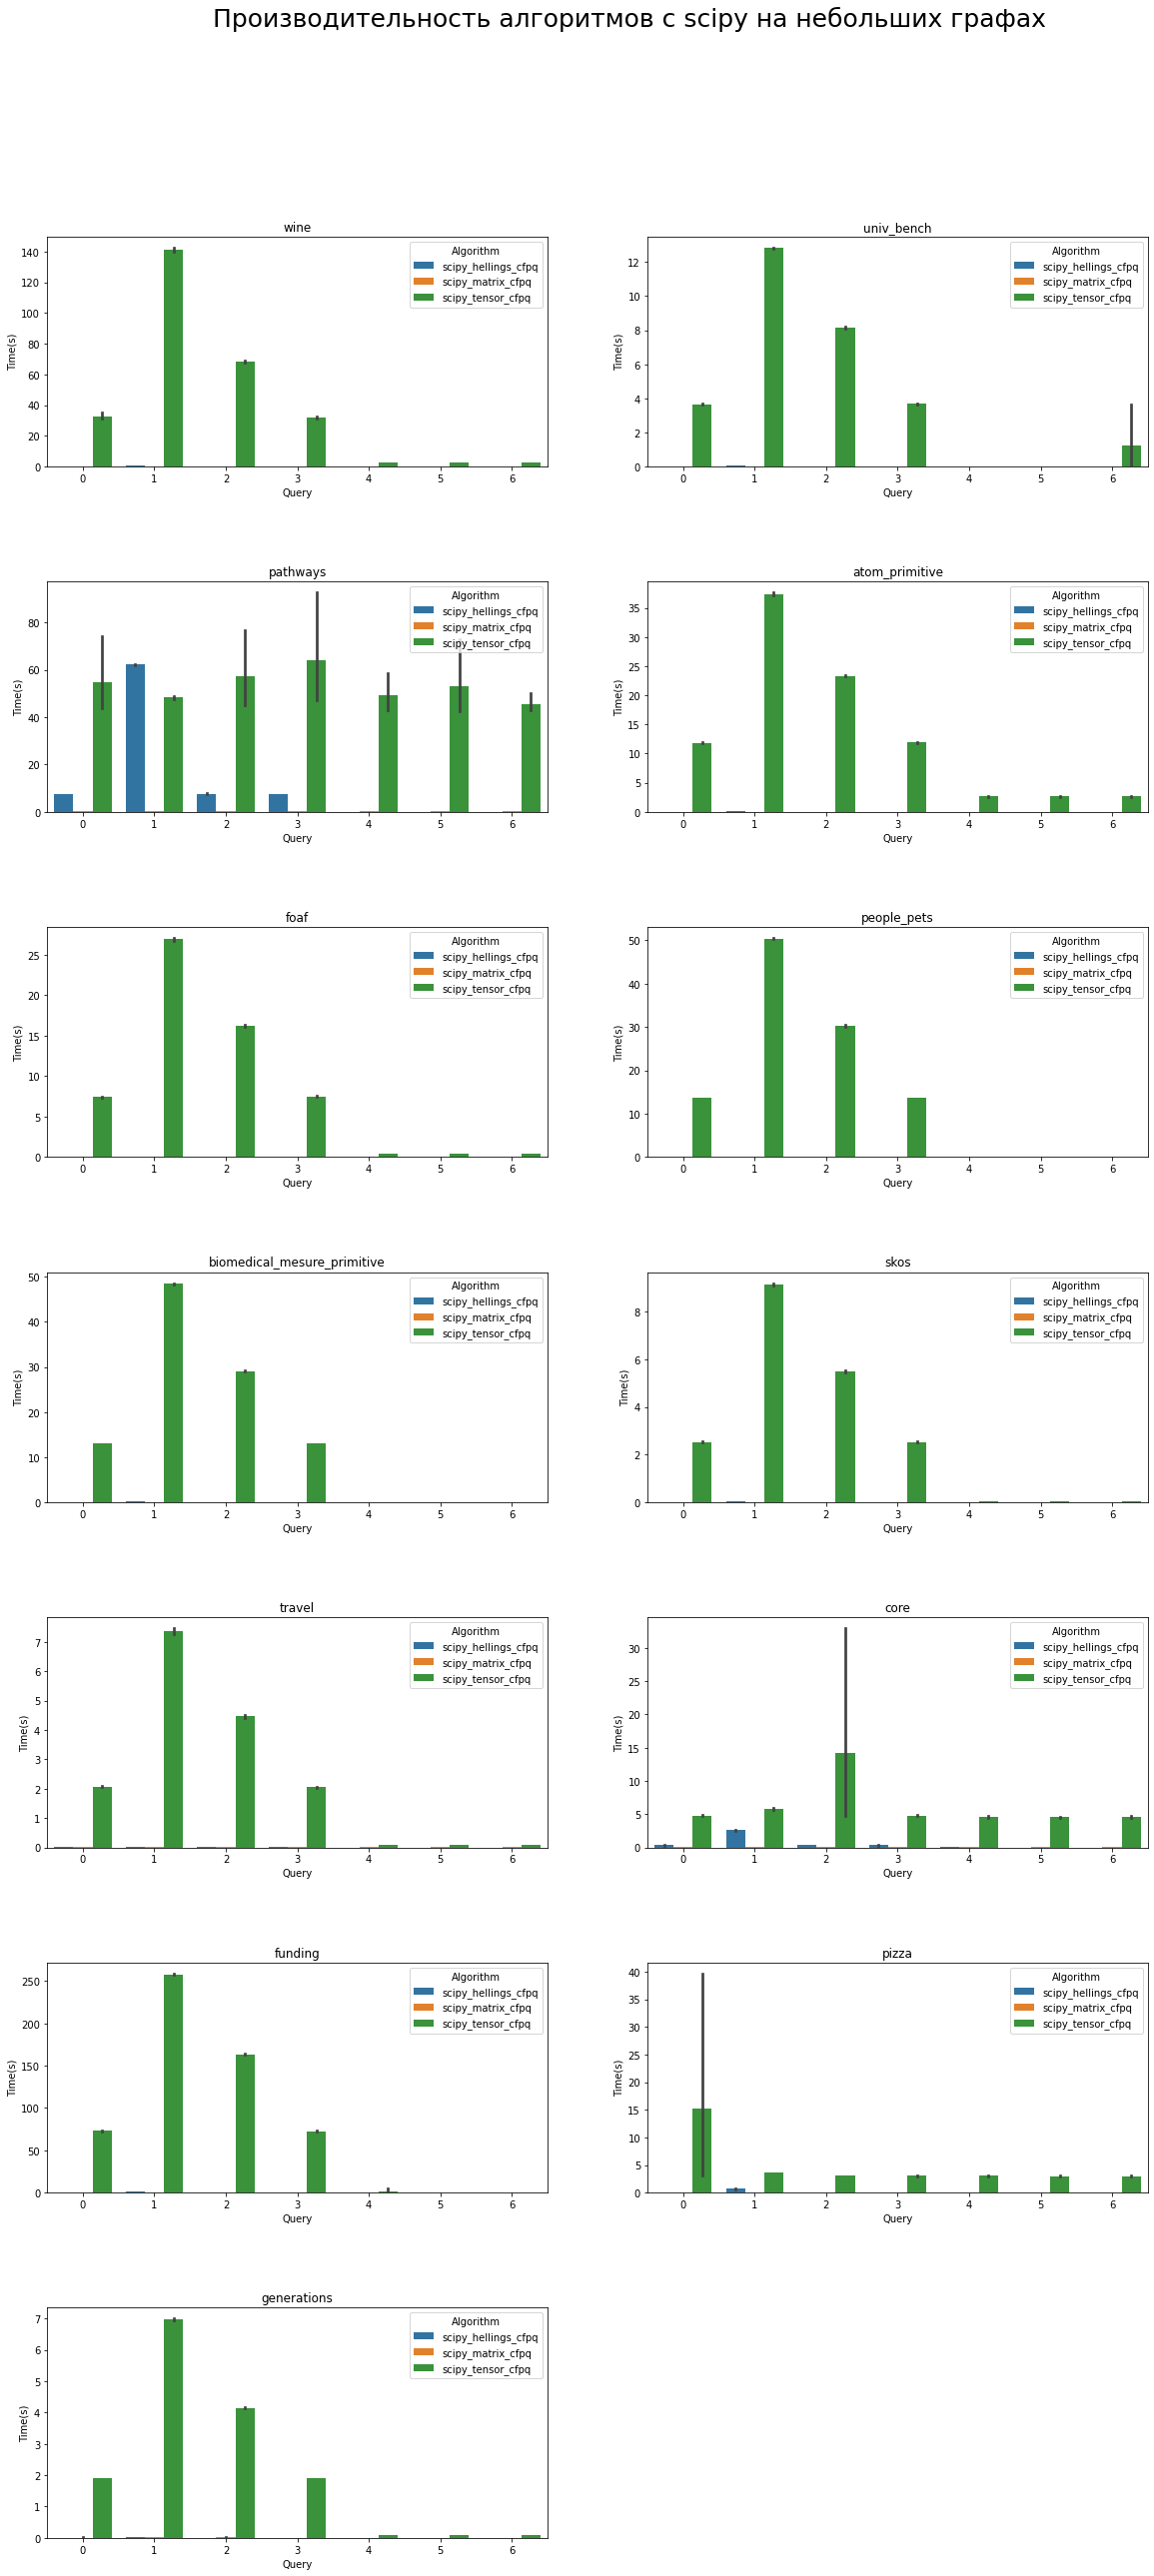

In [165]:
df_sm_scipy = pd.merge(create_df(small_graph_names, scipy_algos), graph_descriptions, right_index=True, left_on='Graph')
show_small_barplots(df_sm_scipy, 'Производительность алгоритмов с scipy на небольших графах')

#### pyCuBool (GPU)

In [31]:
pycubool_algos = [
         ('pycubool', 'cb_matrix_cfpq', 'researches/data/pycubool_matrix_cfpq'),
         ('pycubool', 'cb_tensor_cfpq', 'researches/data/pycubool_tensor_cfpq'),
]

In [ ]:
measure_algos_performance(small_graphs, num_runs=10, algos=pycubool_algos)

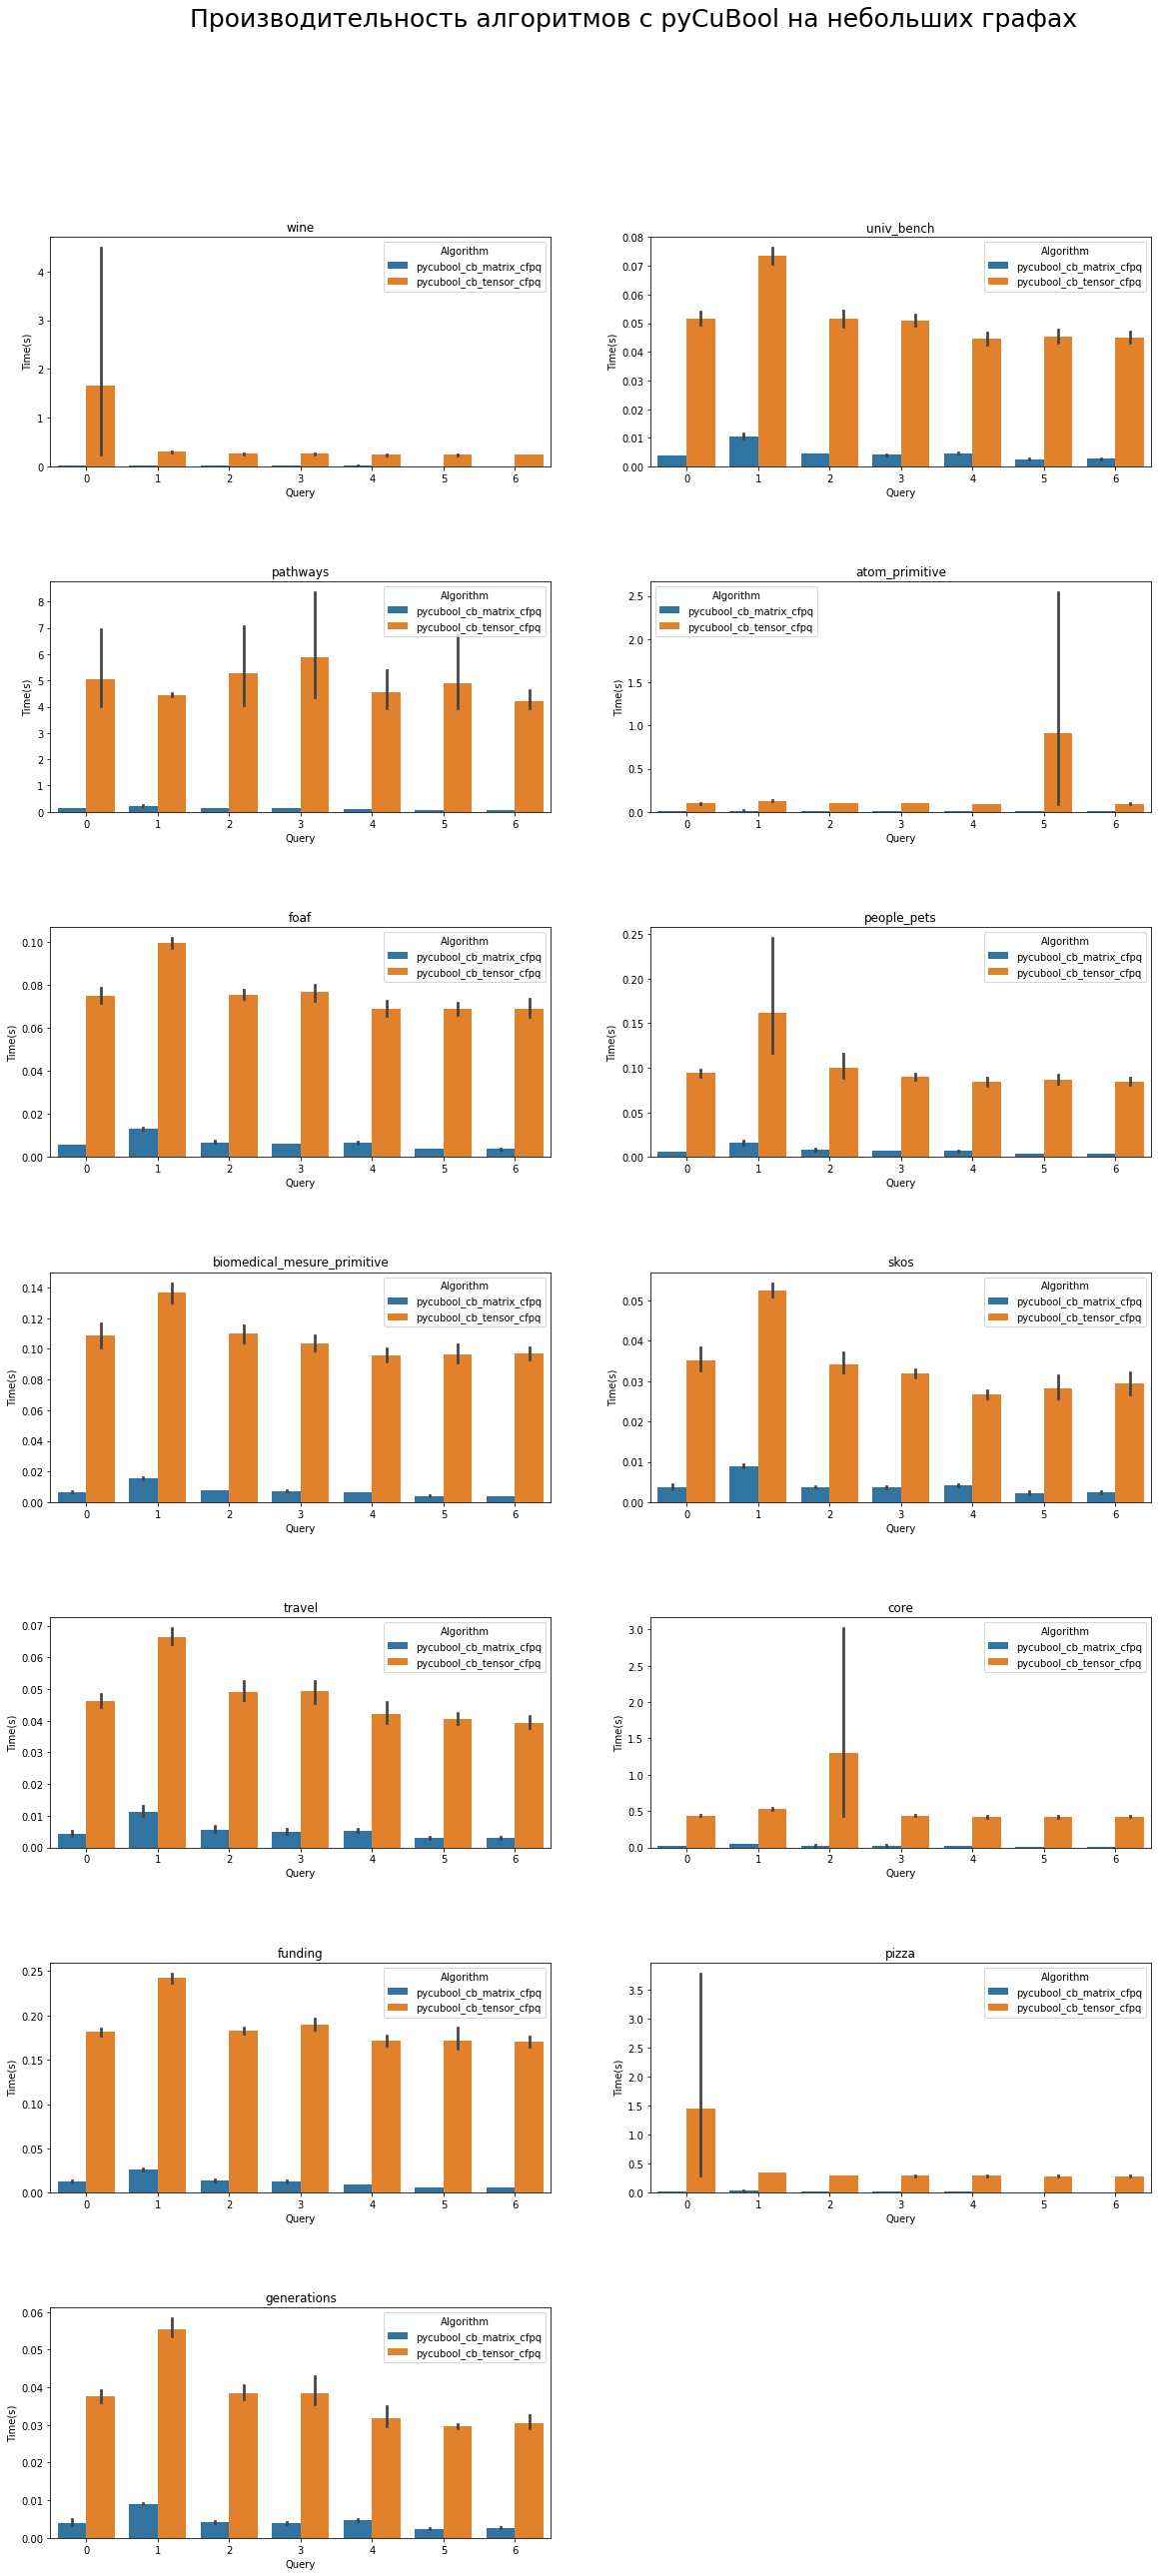

In [166]:
df_sm_pycubool = pd.merge(create_df(small_graph_names, pycubool_algos), graph_descriptions, right_index=True, left_on='Graph')
show_small_barplots(df_sm_pycubool, 'Производительность алгоритмов с pyCuBool на небольших графах')

### Большие графы

#### scipy (CPU)

In [83]:
scipy_algos = [
      ('scipy', 'hellings_cfpq', 'researches/data/scipy_hellings_cfpq'),
      ('scipy', 'matrix_cfpq', 'researches/data/scipy_matrix_cfpq'),
      ('scipy', 'tensor_cfpq', 'researches/data/scipy_tensor_cfpq'),
]

In [ ]:
measure_algos_performance(large_graphs, num_runs=3, algos=scipy_algos)

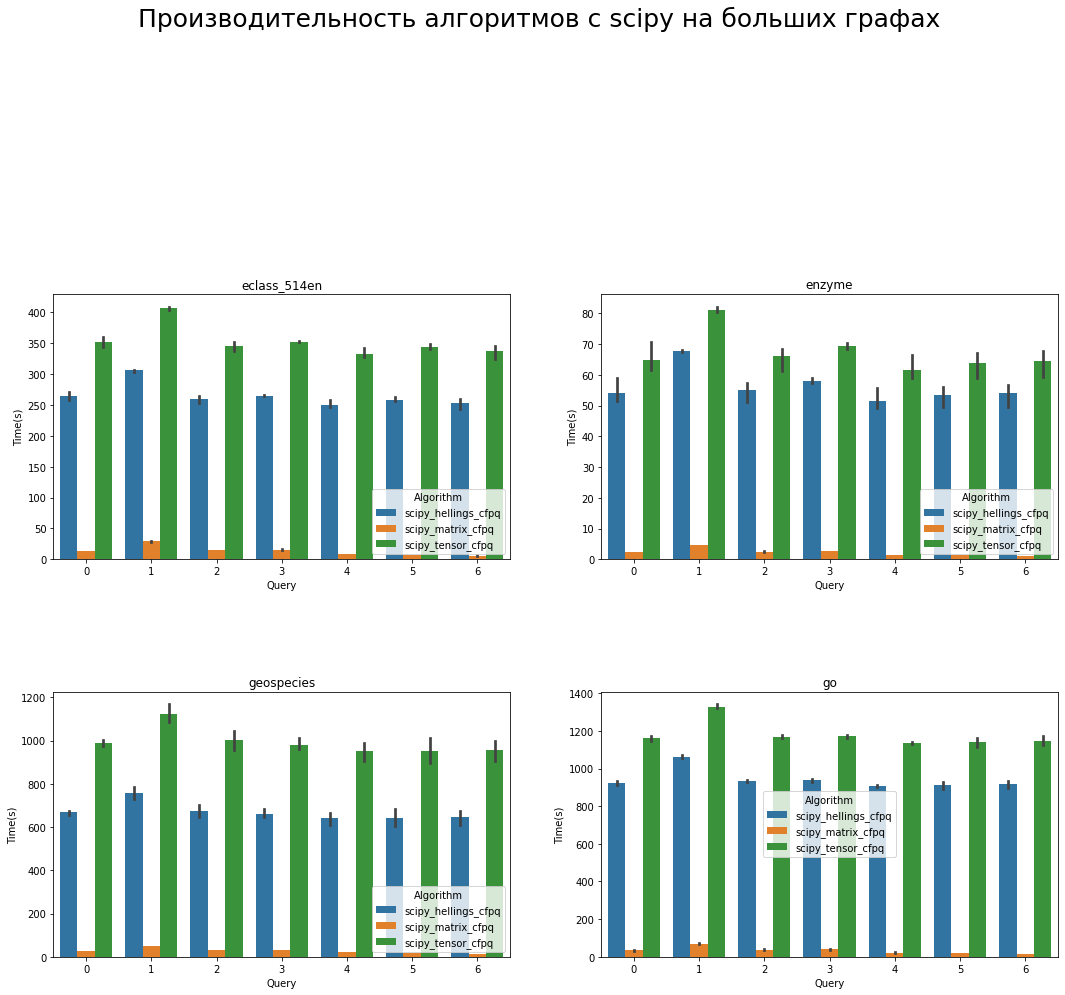

In [167]:
df_lg_scipy = pd.merge(create_df(large_graph_names, scipy_algos), graph_descriptions, right_index=True, left_on='Graph')
show_large_barplots(df_lg_scipy, 'Производительность алгоритмов с scipy на больших графах')

#### pyCuBool (GPU)

In [82]:
pycubool_algos = [
         ('pycubool', 'cb_matrix_cfpq', 'researches/data/pycubool_matrix_cfpq'),
         ('pycubool', 'cb_tensor_cfpq', 'researches/data/pycubool_tensor_cfpq'),
]

In [ ]:
measure_algos_performance(large_graphs, num_runs=3, algos=pycubool_algos)

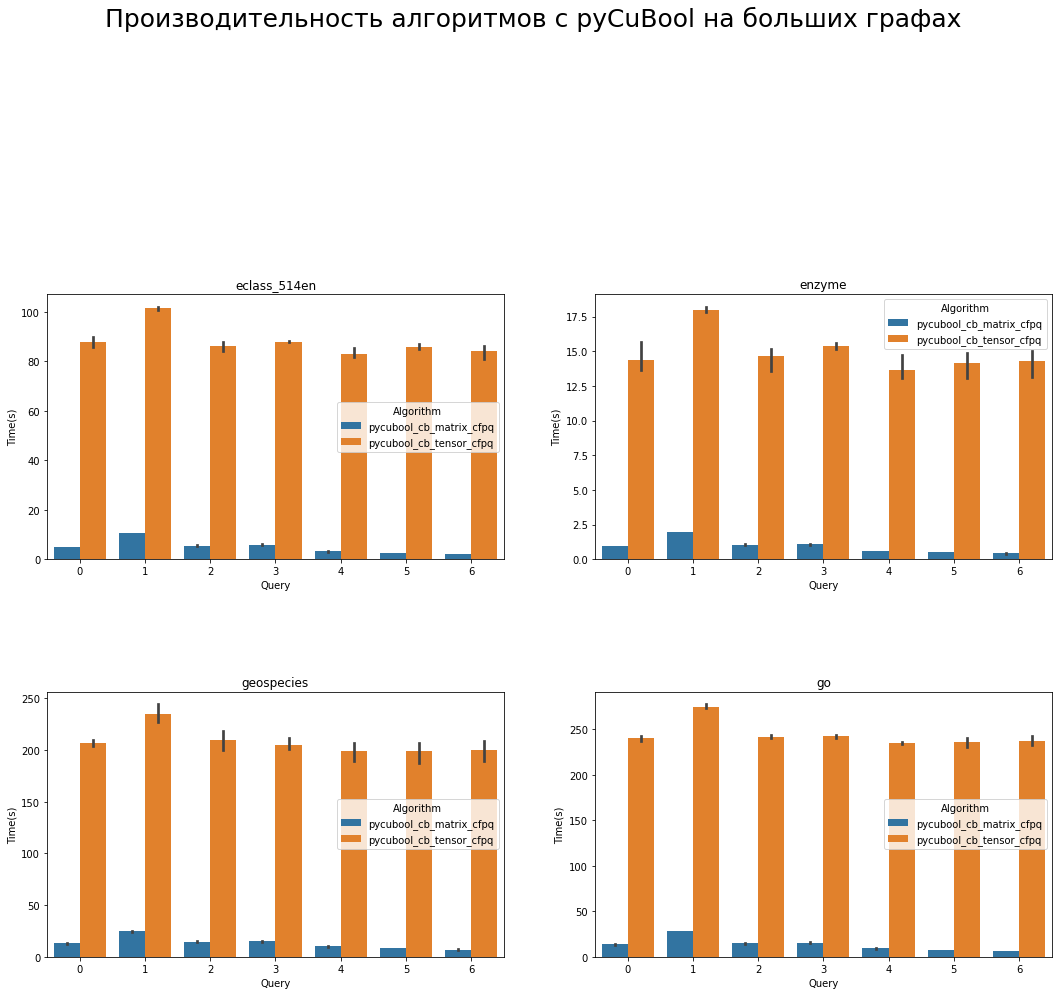

In [168]:
df_lg_pycubool = pd.merge(create_df(large_graph_names, pycubool_algos), graph_descriptions, right_index=True, left_on='Graph')
show_large_barplots(df_lg_pycubool, 'Производительность алгоритмов с pyCuBool на больших графах')